In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('admission prediction.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
#not much feature engineering required as  all feature columns are required in predicting
#probability chance of a student being admitted
#am going to build two regression models to predict chance of admission and another to 
#predict the university star rating one is able to join.

In [4]:
df1 = df.drop(['Serial No.','University Rating'], axis ='columns')
df1.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4.5,4.5,9.65,1,0.92
1,324,107,4.0,4.5,8.87,1,0.76
2,316,104,3.0,3.5,8.00,1,0.72
3,322,110,3.5,2.5,8.67,1,0.80
4,314,103,2.0,3.0,8.21,0,0.65


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017FF0570588>,
      dtype=object)

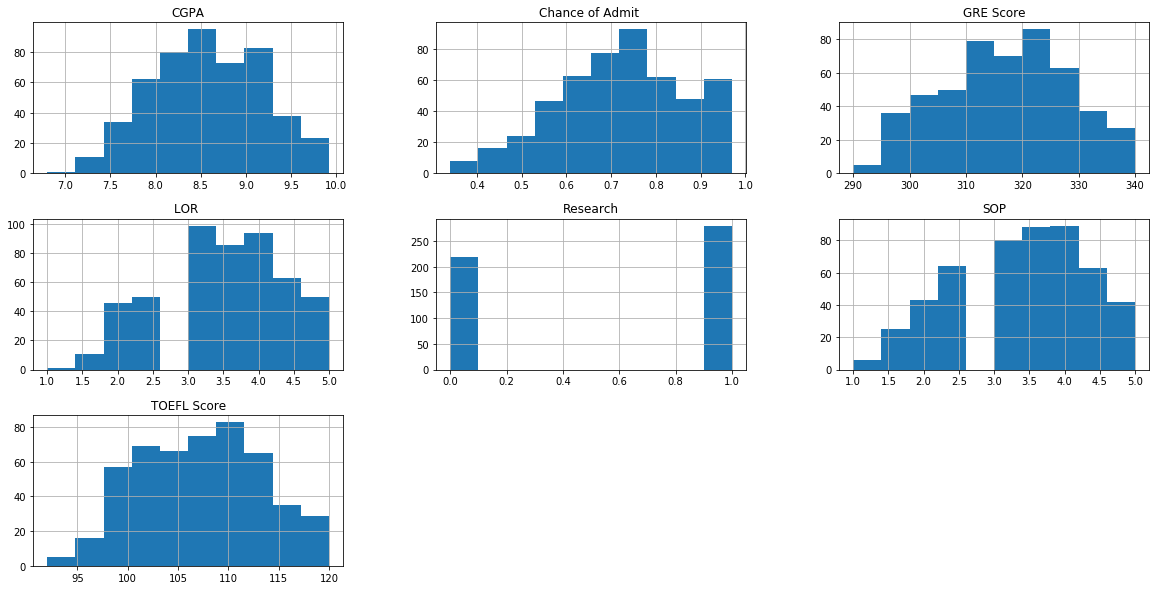

In [5]:
df1.hist(figsize=(20,10))

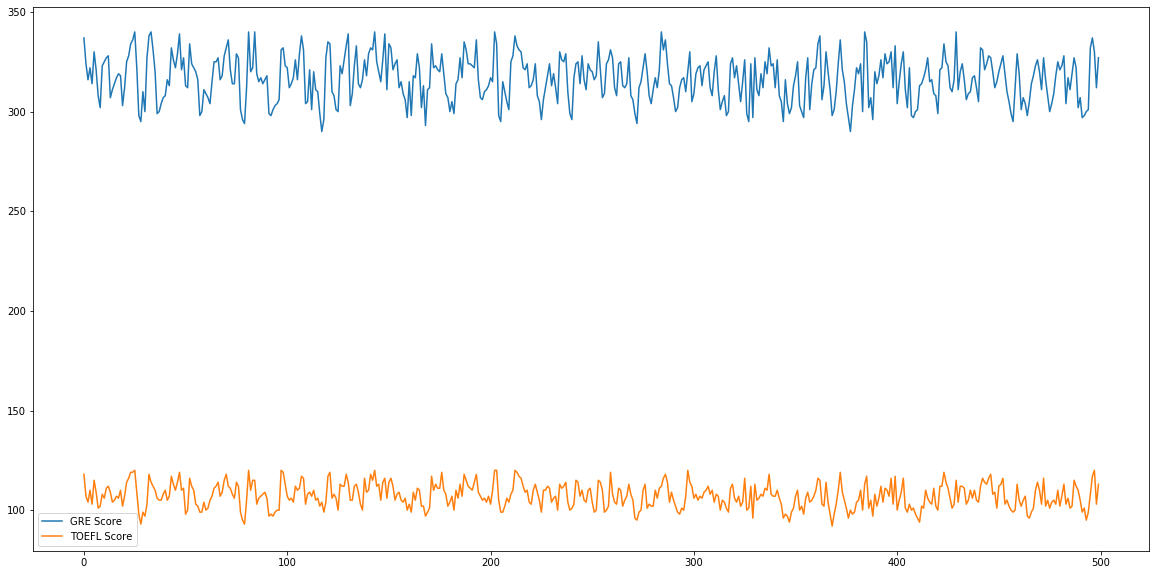

In [6]:
df1[['GRE Score','TOEFL Score']].plot(figsize=(20,10))

In [7]:
df1.isnull().sum()

GRE Score           0
TOEFL Score         0
SOP                 0
LOR                 0
CGPA                0
Research            0
Chance of Admit     0
dtype: int64

In [8]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression

In [44]:
X = df1.loc[:,df1.columns!='Chance of Admit']
y = df1.loc[:,'Chance of Admit']

shuffle_x, shuffle_y = shuffle(X,y)

KeyError: 'Chance of Admit'

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(shuffle_x, shuffle_y, test_size=0.2)

In [21]:
from sklearn.model_selection import cross_val_score
linear.fit(X_train, y_train)
training_score = cross_val_score(linear, X_train, y_train, cv=5)
print("Linear regression model: ", "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Linear regression model:  Has a training score of 100.0 % accuracy score


C:\Users\VOS\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\VOS\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "m

In [23]:
accuracy = linear.score(X_test, y_test)
training_score = cross_val_score(linear, X_test, y_test, cv=5)
print("Linear regression model: ", "Has a final testing score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Linear regression model:  Has a final testing score of 100.0 % accuracy score


C:\Users\VOS\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\VOS\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "m

In [25]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
def plot_learning_curve(estimator1,X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",label="Cross-validation score")
    ax1.set_title("Linear Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

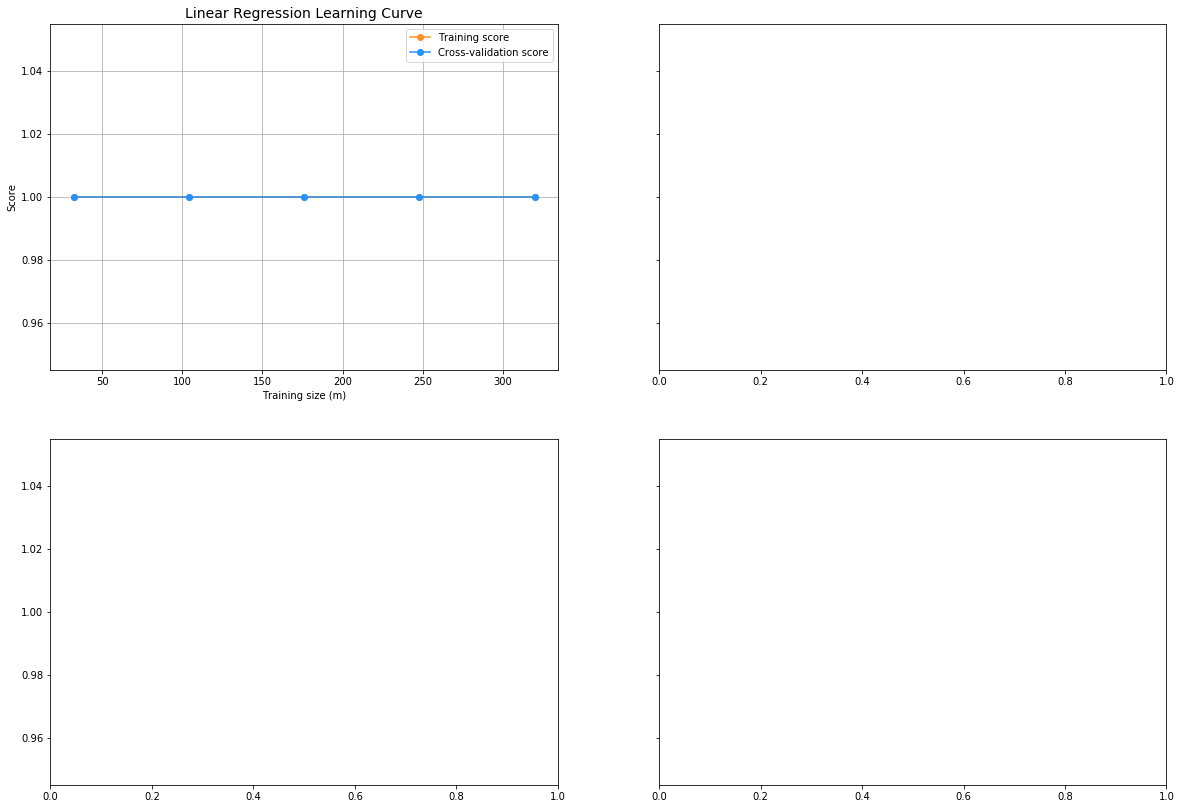

In [26]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(linear,X_train, y_train, cv=cv, n_jobs=4)